# Stage 01: Problem Framing & Scoping
Goal: Enable individual investors to analyze and predict NVDA stock trends for the future using open data and reproducible analytics.

### Data Dictionary:
+ Date: Trading day
+ Open: Opening price
+ High: Highest price
+ Low: Lowest price
+ Close: Closing price
+ Volume: Trading volume

### Methodology:

Acquire daily OHLCV data for NVDA (2023-2025)
Clean, analyze, and model the data for trend detection and prediction

# Stage02：tooling_setup

In [36]:
# Environment & Setup Quick Check
from pathlib import Path
import os, sys
from dotenv import load_dotenv

#check.env 
load_dotenv() 
print(".env loaded (if present)")

# Define project directories
PROJECT_ROOT = Path.cwd()
DATA_DIR = PROJECT_ROOT / "data"
print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_DIR:", DATA_DIR)

#check api key
API_KEY = os.getenv("API_KEY")
if API_KEY:
    print("API_KEY is set")
else:
    print("API_KEY is not set")

#check requirements txt
if os.path.exists('requirements.txt'):
    size = os.path.getsize('requirements.txt')
    if size > 0:
        print(f"text exist & is non-empty ")
    else:
        print("text exist but empty")
else:
    print("text non-exist")


.env loaded (if present)
PROJECT_ROOT: c:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project\notebooks
DATA_DIR: c:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project\notebooks\data
API_KEY is set
text exist & is non-empty 


# Stage03：Python_fundamentals

In [ ]:
from pathlib import Path
import pandas as pd

# load dataset
project_root = Path.cwd().parent
data_path = project_root / "data" / "raw" / "NVDA-Starter Data 2021-2025 Daily.csv"

print("Looking for data file at:", data_path)
print("File exists:", data_path.exists())

df = pd.read_csv(data_path)

# Dataset quick check
print("Dataset loading:\n", df)
print(df.info())
print(df.head())
print("Summary Statistics:\n", df.describe())

Looking for data file at: c:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project\data\raw\NVDA-Starter Data 2021-2025 Daily.csv
File exists: True
Dataset loading:
            time     open       high        low    close
0    2023-04-25   27.078   27.24700   26.22500   26.241
1    2023-04-26   27.002   27.33000   26.70510   26.956
2    2023-04-27   27.363   27.49500   26.62501   27.226
3    2023-04-28   27.225   27.75800   27.07148   27.749
4    2023-05-01   27.840   29.05844   27.78000   28.910
..          ...      ...        ...        ...      ...
579  2025-08-15  181.880  181.90000  178.04170  180.450
580  2025-08-18  180.600  182.93750  180.59000  182.010
581  2025-08-19  182.430  182.50000  175.49000  175.640
582  2025-08-20  175.165  176.00000  168.80100  175.400
583  2025-08-21  174.850  176.90000  173.81000  174.980

[584 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 5 c

In [ ]:
# src\utils demo
import sys

src_path = Path.cwd().parent / "src"
sys.path.append(str(src_path))

from utils import calc_mean_std_logged  

# utils example 
print(calc_mean_std_logged([1, 2, 3, 4, 5]))

Function calc_mean_std_logged called at 2025-08-23 09:42:46.217032
Function calc_mean_std_logged called at 2025-08-23 09:42:46.217559
(np.float64(3.0), np.float64(1.4142135623730951))


In [57]:
#summarize the dataset
print("Column names:", df.columns.tolist())
print("Number of rows:", len(df))

def df_Summary():
    return df.groupby(df.columns[0]).agg({
        df.columns[1]: ['mean', 'sum', 'count']
    })

#Quick check example
print(df_Summary().head(10))


Column names: ['time', 'open', 'high', 'low', 'close']
Number of rows: 584
               open               
               mean      sum count
time                              
2023-04-25  27.0780  27.0780     1
2023-04-26  27.0020  27.0020     1
2023-04-27  27.3630  27.3630     1
2023-04-28  27.2250  27.2250     1
2023-05-01  27.8400  27.8400     1
2023-05-02  28.6800  28.6800     1
2023-05-03  27.8400  27.8400     1
2023-05-04  27.6510  27.6510     1
2023-05-05  27.8255  27.8255     1
2023-05-08  28.5220  28.5220     1


In [ ]:
#To keep the dataset integrity, I will save all to the summary.csv file
project_root = Path.cwd().parent
processed_dir = project_root / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

summary_stats = df.describe()
summary_stats.to_csv(processed_dir / "summary.csv")
print(f"Summary stats saved to {processed_dir / 'summary.csv'}")

Summary stats saved to c:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project\data\processed\summary.csv


# Stage04：Data Acquisition and Ingestion

+ The NVDA dataset for the project has downloaded in homework time, therefore the script below is to demonstrate for milestone requirements

In [ ]:
# Download stock data from yfinance
SYMBOL = 'NVDA'
import yfinance as yf
df_api = yf.download(SYMBOL, period='6mo', interval='1d', auto_adjust=True).reset_index()
# Use 'Adj Close' if present, else use 'Close'
if 'Adj Close' in df_api.columns:
    df_api = df_api[['Date', 'Adj Close']]
    df_api.columns = ['date', 'adj_close']
elif 'Close' in df_api.columns:
    df_api = df_api[['Date', 'Close']]
    df_api.columns = ['date', 'adj_close']
else:
    raise ValueError("No 'Adj Close' or 'Close' column found in yfinance data")

# Quick check
df_api.head()


[*********************100%***********************]  1 of 1 completed


,date,adj_close
0,2025-02-24,130.258972
1,2025-02-25,126.609558
2,2025-02-26,131.258820
3,2025-02-27,120.130608
4,2025-02-28,124.899834


# Stage05：Data Storage

+ The NVDA dataset for the project has storaged in homework time, therefore the script below is to demonstrate for milestone requirements

In [12]:
# Save NVDA random parquet file
import datetime as dt
import pandas as pd
import numpy as np  
from pathlib import Path

dates = pd.date_range('2024-01-01', periods=30, freq='D')
df = pd.DataFrame({'date': dates, 'ticker': ['NVDA']*30, 'price': 150 + np.random.randn(30).cumsum()})
df.head()

,date,ticker,price
0,2024-01-01,NVDA,150.288041
1,2024-01-02,NVDA,149.921512
2,2024-01-03,NVDA,147.967814
3,2024-01-04,NVDA,147.127902
4,2024-01-05,NVDA,147.133487


In [13]:
def ts(): return dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# TODO: Save CSV
project_root = Path.cwd().parent
csv_path = project_root / "data" / "raw" / f"sample_{ts()}.csv"
df.to_csv(csv_path, index=False)
csv_path

# TODO: Save Parquet
pq_path = project_root / "data" / "processed" / f"sample_{ts()}.parquet"
try:
    df.to_parquet(pq_path)
except Exception as e:
    print('Parquet engine not available. Install pyarrow or fastparquet to complete this step.')
    pq_path = None
pq_path

WindowsPath('c:/Users/noven/Desktop/Github Fre-5040 Bootcamp/bootcamp_Junkuang_Lai/Bootcamp_Junkuang_Lai/project/data/processed/sample_20250823-133556.parquet')

# Stage06: Data Cleaning & Preprocessing

In [15]:
#ensure librairies
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import os
from pathlib import Path
import sys  
from src import cleaning

In [20]:
# Load and preview the dataset
try:
    df = pd.read_csv(os.path.join('data', 'raw', 'NVDA-Starter Data 2021-2025 Daily.csv'))
    print(f"Data loaded successfully, Shape: {df.shape}")
    print(df.head(10))
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the file path.")

Data loaded successfully, Shape: (584, 5)
         time     open      high       low   close
0  2023-04-25  27.0780  27.24700  26.22500  26.241
1  2023-04-26  27.0020  27.33000  26.70510  26.956
2  2023-04-27  27.3630  27.49500  26.62501  27.226
3  2023-04-28  27.2250  27.75800  27.07148  27.749
4  2023-05-01  27.8400  29.05844  27.78000  28.910
5  2023-05-02  28.6800  28.83599  28.08300  28.210
6  2023-05-03  27.8400  28.36700  27.47200  27.802
7  2023-05-04  27.6510  27.85900  27.24000  27.562
8  2023-05-05  27.8255  28.75500  27.73100  28.680
9  2023-05-08  28.5220  29.22000  28.35000  29.151


Number of missing values in column 'time': 0
Number of missing values in column 'open': 0
Number of missing values in column 'high': 0
Number of missing values in column 'low': 0
Number of missing values in column 'close': 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    584 non-null    object 
 1   open    584 non-null    float64
 2   high    584 non-null    float64
 3   low     584 non-null    float64
 4   close   584 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.9+ KB


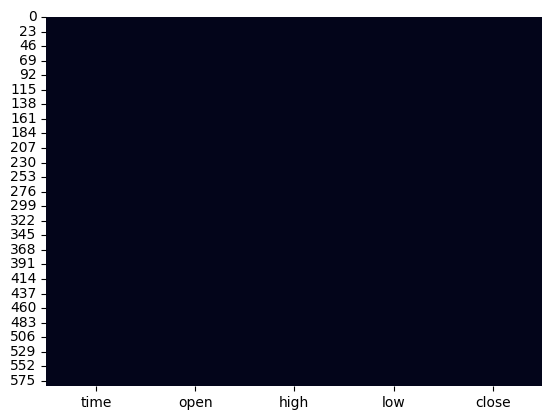

<Axes: >

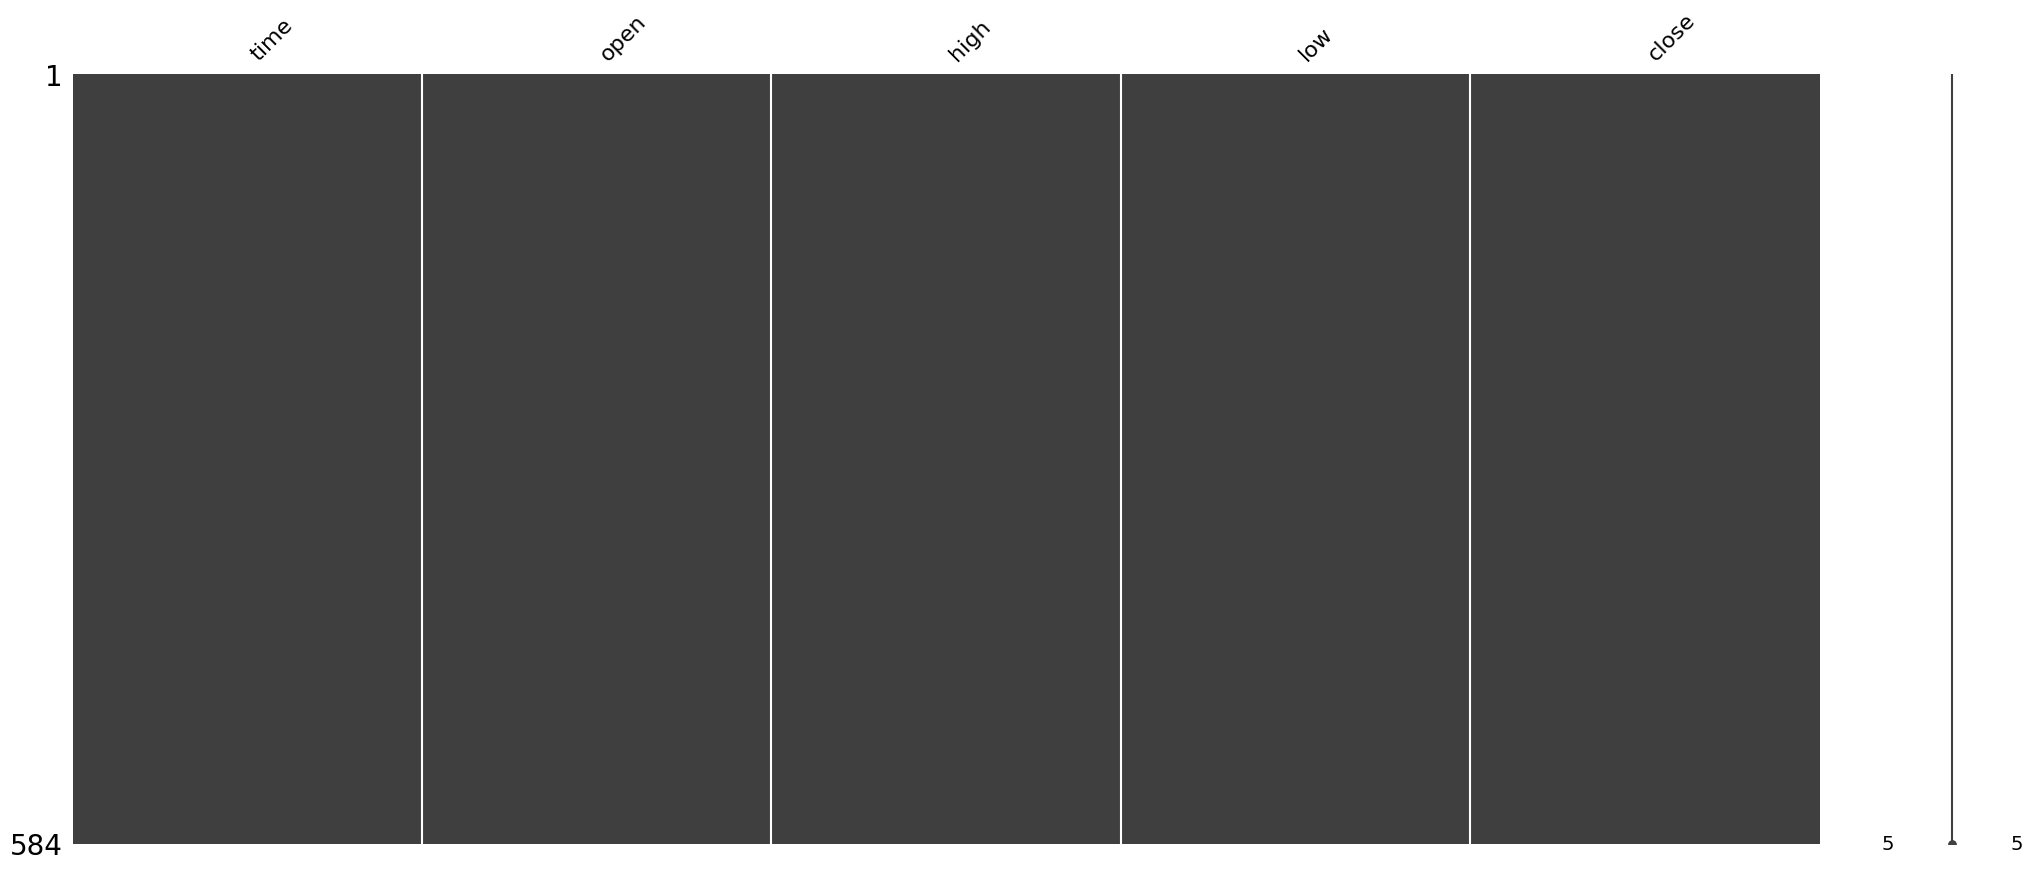

In [19]:
# Check the number of missing values in each column
for col in df.columns:
    print(f"Number of missing values in column '{col}':", df[col].isnull().sum())
df.info()

# Heatmap for missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# missingno visualization
msno.matrix(df)

### Assumption
+ This shows a practical problem, dataset in real life might not keep integrity.

+ Therefore, in order to demonstrate the diffrences between cleaned_data and uncleaned_datad and for better display the future monthly trends as a reference to the stackholders.The project will create a uncleaned_data file storaged in "data/raw";

+ The project will select datetime 2024.June as starter data for reaserching pupose 

In [ ]:
# Define the original dataset
dates = pd.date_range("2024-06-01", "2024-06-30", freq="D")  # Generate dates for June 2024
data = {
    "date": dates,
    "open": np.round(np.random.uniform(100, 200, len(dates)), 2),  # Random open prices
    "high": np.round(np.random.uniform(200, 300, len(dates)), 2),  # Random high prices
    "low": np.round(np.random.uniform(50, 100, len(dates)), 2),    # Random low prices
    "close": np.round(np.random.uniform(100, 200, len(dates)), 2), # Random close prices
    "volume": np.random.randint(1000, 5000, len(dates)),           # Random trading volumes
}

# Create the DataFrame
df = pd.DataFrame(data)

# Filter data for June 2024
df_june = df[df["date"].dt.month == 6].copy()  

# Introduce random missing values (without modifying the original data)
df_uncleaned = df_june.copy()  # Create a copy to preserve the original data
np.random.seed(42)  # Set random seed for reproducibility
for col in ["open", "high", "low", "close", "volume"]:
    missing_indices = np.random.choice(df_uncleaned.index, size=3, replace=False)  # Randomly select indices
    df_uncleaned.loc[missing_indices, col] = np.nan  # Set selected values to NaN

# uncleaned_data storage
df_uncleaned.to_csv(os.path.join('data', 'raw', 'uncleaned_data.csv'), index=False) 

# quick check
print("\nData with random missing values:")
df_uncleaned.info()
df_uncleaned.head(10)


Data with random missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30 non-null     datetime64[ns]
 1   open    27 non-null     float64       
 2   high    27 non-null     float64       
 3   low     27 non-null     float64       
 4   close   27 non-null     float64       
 5   volume  27 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 KB


,date,open,high,low,close,volume
0,2024-06-01,111.09,NaN,68.48,151.66,2527.0
1,2024-06-02,143.93,216.47,62.11,NaN,2919.0
2,2024-06-03,120.17,253.41,90.16,199.63,2415.0
3,2024-06-04,189.58,248.48,73.52,NaN,NaN
4,2024-06-05,147.54,269.24,NaN,NaN,2218.0
5,2024-06-06,156.33,NaN,69.94,188.26,1400.0
6,2024-06-07,169.55,224.41,90.82,118.87,1639.0
7,2024-06-08,113.93,216.83,89.92,127.89,4104.0
8,2024-06-09,160.44,221.88,57.54,170.04,3735.0
9,2024-06-10,153.98,255.81,75.41,184.67,1459.0


Number of missing values in column 'date': 0
Number of missing values in column 'open': 3
Number of missing values in column 'high': 3
Number of missing values in column 'low': 3
Number of missing values in column 'close': 3
Number of missing values in column 'volume': 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30 non-null     datetime64[ns]
 1   open    27 non-null     float64       
 2   high    27 non-null     float64       
 3   low     27 non-null     float64       
 4   close   27 non-null     float64       
 5   volume  27 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 KB


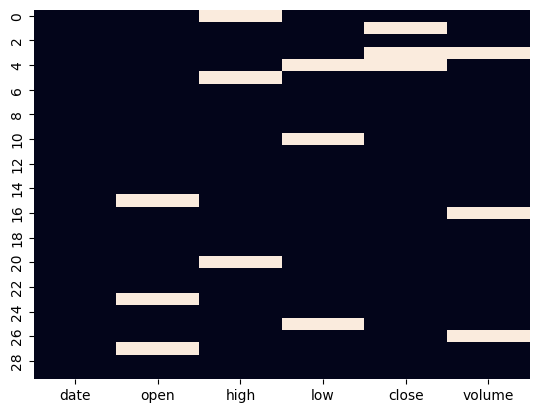

<Axes: >

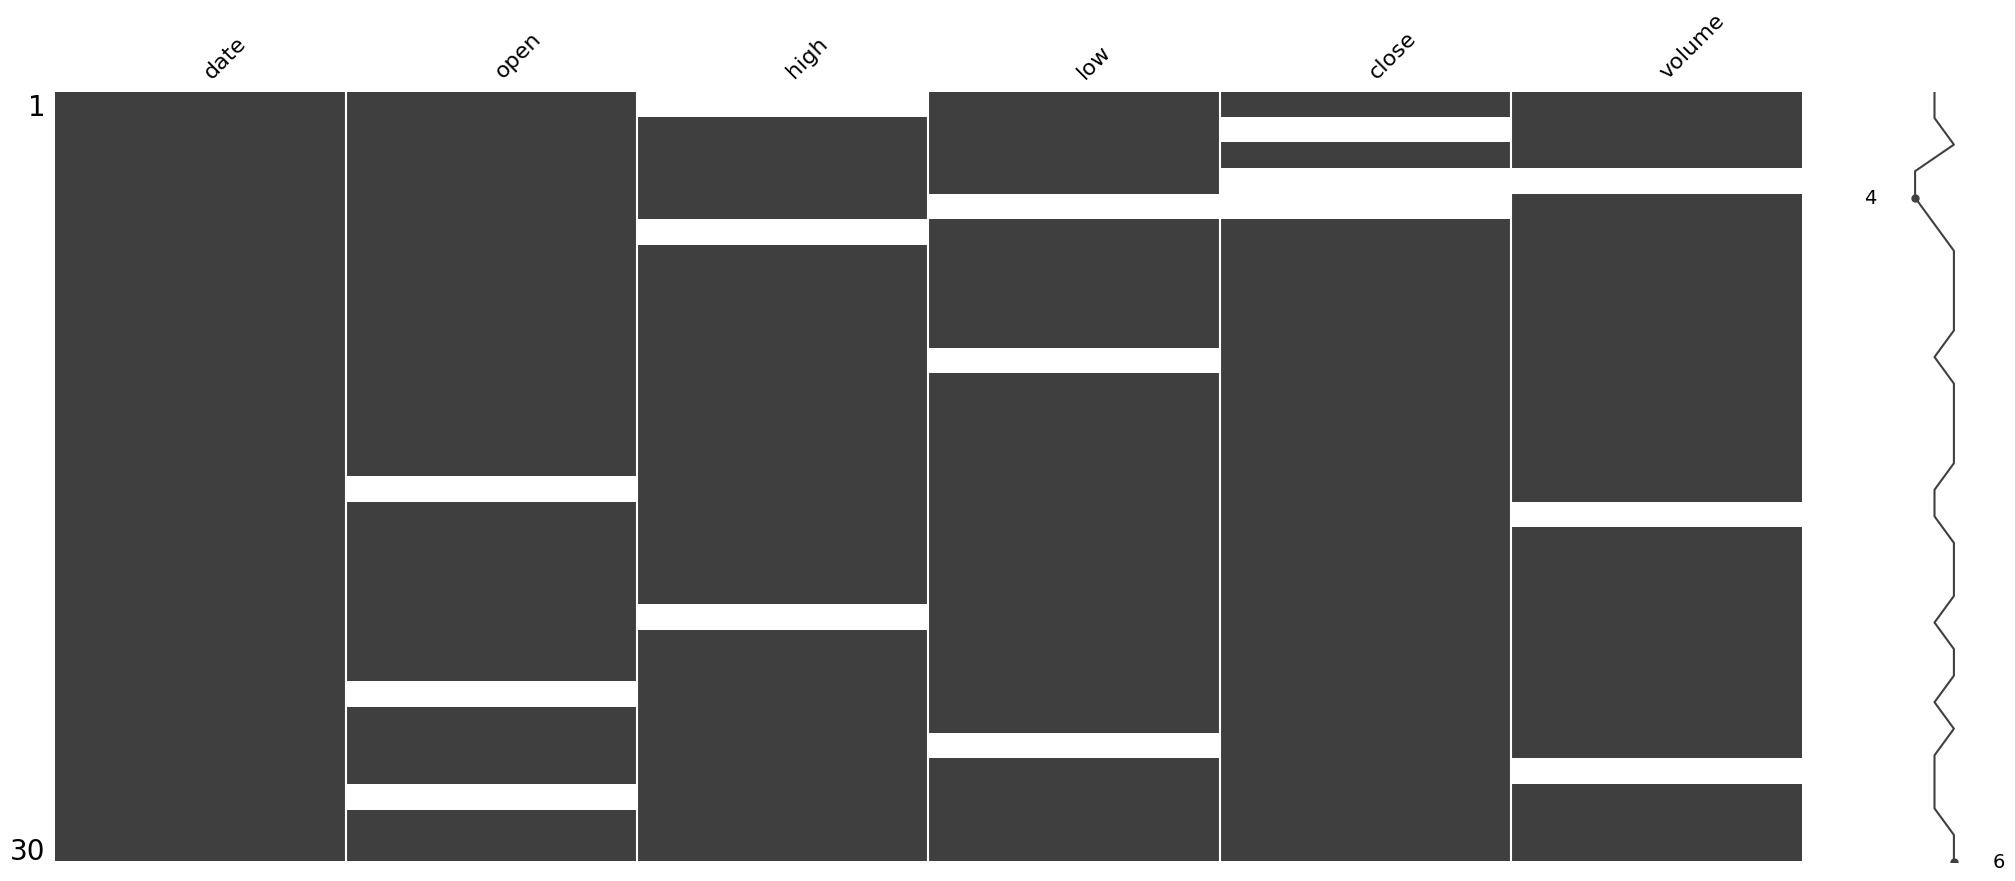

In [28]:
# Check the number of missing values in each column
for col in df_uncleaned.columns:
    print(f"Number of missing values in column '{col}':", df_uncleaned[col].isnull().sum())
df_uncleaned.info()

# Heatmap for missing data
sns.heatmap(df_uncleaned.isnull(), cbar=False)
plt.show()

# missingno visualization
msno.matrix(df_uncleaned)

In [ ]:
# # MCAR: random missing
# df_uncleaned['MCAR_col'] = df_uncleaned['income'].mask(np.random.rand(len(df_uncleaned)) < 0.1)
# # MAR: missing depends on another column
# df_uncleaned['MAR_col'] = df_uncleaned['income'].mask(df_uncleaned['city']=='A')
# # MNAR: missing depends on its own value
# df_uncleaned['MNAR_col'] = df_uncleaned['income'].mask(df_uncleaned['income']>50)
# df_uncleaned

KeyError: 'income'